# MNIST fashion data set

## Loading the MNIST fashion data set

In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Exploring the format of the MNIST fashion data set

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_images)

60000

In [4]:
train_images.ndim

3

In [5]:
train_images.dtype

dtype('uint8')

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

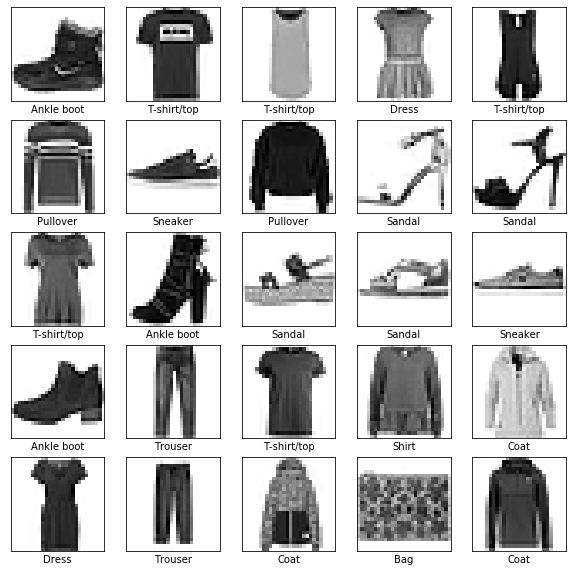

In [10]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

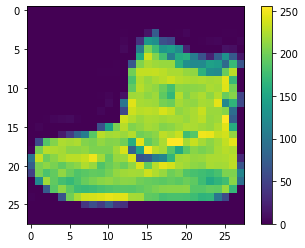

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the model

In [13]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 5
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4804 - acc: 0.8259 - val_loss: 0.4132 - val_acc: 0.8513
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3627 - acc: 0.8655 - val_loss: 0.3940 - val_acc: 0.8610
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3300 - acc: 0.8776 - val_loss: 0.3696 - val_acc: 0.8654
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3092 - acc: 0.8849 - val_loss: 0.3521 - val_acc: 0.8741
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2889 - acc: 0.8907 - val_loss: 0.3619 - val_acc: 0.8683


## Evaluate accuracy

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.3619 - acc: 0.8683
Test accuracy: 0.8683


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 

This gap between training accuracy and test accuracy is an example of **overfitting**. Overfitting is when a machine learning model performs worse on new data than on their training data.



## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

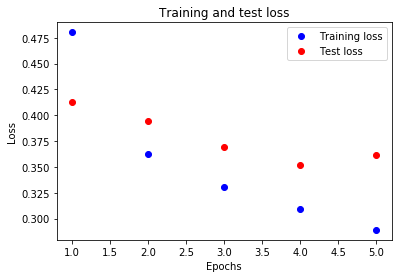

In [16]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

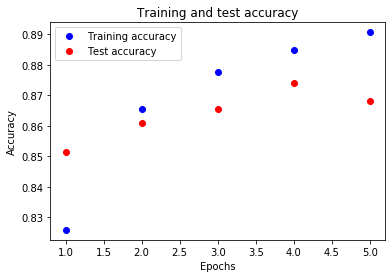

In [18]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make predictions

In [0]:
predictions = model.predict(test_images)

In [20]:
index = 0
predictions[index]

array([2.1533106e-07, 1.0007556e-08, 2.0710543e-08, 2.2990110e-09,
       2.2527515e-09, 3.0203984e-04, 9.8151020e-08, 1.7811246e-03,
       7.1870926e-07, 9.9791580e-01], dtype=float32)

In [21]:
np.argmax(predictions[index])

9

In [22]:
test_labels[index]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

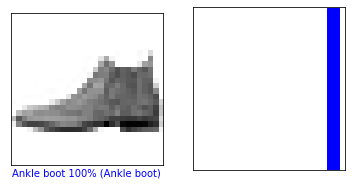

In [24]:
index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions,  test_labels)


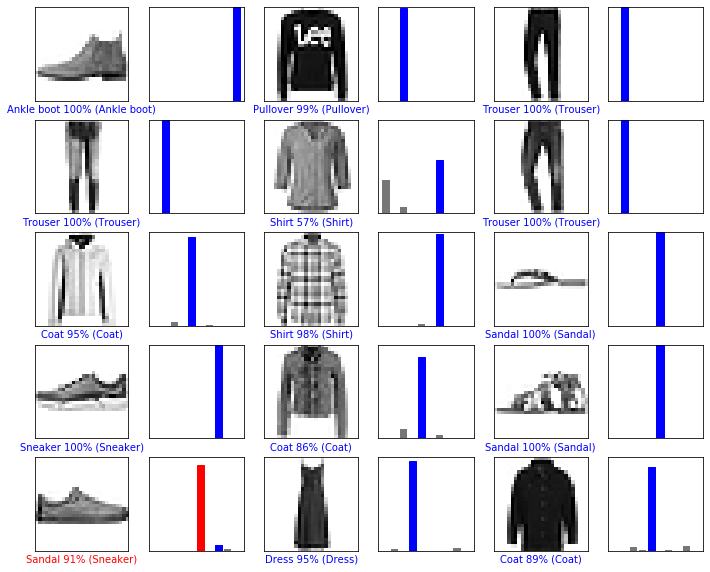

In [25]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


## Make prediction about a single image

In [26]:
index = 0
test_image = test_images[index]
print(test_image.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member
test_image_single = (np.expand_dims(test_image, 0))
print(test_image_single.shape)

(1, 28, 28)


In [28]:
predictions_single = model.predict(test_image_single)
print(predictions_single)

[[2.1533064e-07 1.0007556e-08 2.0710504e-08 2.2990152e-09 2.2527515e-09
  3.0203984e-04 9.8150835e-08 1.7811237e-03 7.1870926e-07 9.9791580e-01]]


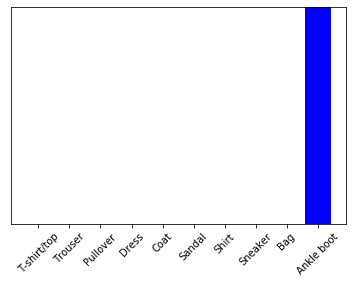

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

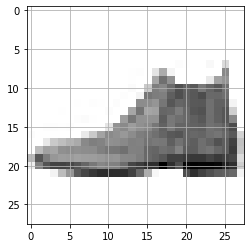

In [30]:
plt.imshow(test_image, cmap=plt.cm.binary)
plt.grid(None)

In [31]:
np.argmax(predictions_single[0])

9

In [32]:
test_labels[index]

9